<a href="https://colab.research.google.com/github/Shamnath16/Electricity-Consumption-and-Cost-Analysis-SKE1033-Assignment/blob/main/Finalver_of_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =====================================================
# Task 1: Data Cleaning Process
# =====================================================

import pandas as pd
import numpy as np

# -----------------------------------------------------
# 1. Load the dataset
# -----------------------------------------------------
df = pd.read_csv("dataset_student.csv")

# -----------------------------------------------------
# 2. Inspect missing values
# -----------------------------------------------------
print("Missing values before cleaning:")
print(df.isnull().sum())

# -----------------------------------------------------
# 3. Sort data for proper time-based interpolation
# -----------------------------------------------------
df = df.sort_values(by=["Region", "Year", "Month"])

# -----------------------------------------------------
# 4. Handle missing values using INTERPOLATION
# -----------------------------------------------------
df["Consumption_kWh"] = (
    df.groupby("Region")["Consumption_kWh"]
    .transform(lambda x: x.interpolate(method="linear"))
)

df["Cost_RM"] = (
    df.groupby("Region")["Cost_RM"]
    .transform(lambda x: x.interpolate(method="linear"))
)

# -----------------------------------------------------
# 5. Handle missing Occupants using MEDIAN BY REGION
# -----------------------------------------------------
df["Occupants"] = (
    df.groupby("Region")["Occupants"]
    .transform(lambda x: x.fillna(x.median()))
)

print("\nMissing values after handling:")
print(df.isnull().sum())

# -----------------------------------------------------
# 6. Detect and handle outliers (IQR) — Consumption_kWh
# -----------------------------------------------------
Q1_c = df["Consumption_kWh"].quantile(0.25)
Q3_c = df["Consumption_kWh"].quantile(0.75)
IQR_c = Q3_c - Q1_c

lower_c = Q1_c - 1.5 * IQR_c
upper_c = Q3_c + 1.5 * IQR_c

outliers_c = (
    (df["Consumption_kWh"] < lower_c) |
    (df["Consumption_kWh"] > upper_c)
)

print(f"\nConsumption_kWh outliers detected: {outliers_c.sum()}")

df.loc[outliers_c, "Consumption_kWh"] = df["Consumption_kWh"].median()

# -----------------------------------------------------
# 7. Detect and handle outliers (IQR) — Cost_RM
# -----------------------------------------------------
Q1_cost = df["Cost_RM"].quantile(0.25)
Q3_cost = df["Cost_RM"].quantile(0.75)
IQR_cost = Q3_cost - Q1_cost

lower_cost = Q1_cost - 1.5 * IQR_cost
upper_cost = Q3_cost + 1.5 * IQR_cost

outliers_cost = (
    (df["Cost_RM"] < lower_cost) |
    (df["Cost_RM"] > upper_cost)
)

print(f"Cost_RM outliers detected: {outliers_cost.sum()}")

df.loc[outliers_cost, "Cost_RM"] = df["Cost_RM"].median()

print("\nOutliers in Consumption_kWh and Cost_RM replaced with median values.")

# -----------------------------------------------------
# 8. Preview cleaned dataset
# -----------------------------------------------------
print("\nCleaned dataset preview:")
print(df.head())

# -----------------------------------------------------
# 9. Save cleaned dataset for Task 2–Task 4
# -----------------------------------------------------
df.to_csv("cleaned_dataset_student.csv", index=False)

print("Cleaned dataset saved as 'cleaned_dataset_student.csv'")

Missing values before cleaning:
Year               0
Month              0
Region             0
Consumption_kWh    5
Cost_RM            5
Occupants          5
dtype: int64

Missing values after handling:
Year               0
Month              0
Region             0
Consumption_kWh    0
Cost_RM            0
Occupants          0
dtype: int64

Consumption_kWh outliers detected: 2
Cost_RM outliers detected: 0

Outliers in Consumption_kWh and Cost_RM replaced with median values.

Cleaned dataset preview:
    Year  Month Region  Consumption_kWh  Cost_RM  Occupants
2   2018      1  Rural           283.32   161.49        6.0
5   2018      2  Rural           341.51   194.66        4.0
8   2018      3  Rural           355.59   202.69        7.0
11  2018      4  Rural           337.14   192.17        7.0
14  2018      5  Rural           342.52   195.24        6.0
Cleaned dataset saved as 'cleaned_dataset_student.csv'


In [ ]:
# -----------------------------------------------------
# Task 2: Descriptive Data Analysis
# Using cleaned data from Task 1
# -----------------------------------------------------

import pandas as pd
import os # Import os module to check for file existence

# -----------------------------------------------------
# 1. Load cleaned dataset
# -----------------------------------------------------
# This file was saved at the end of Task 1
file_path = "cleaned_dataset_student.csv"
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure that Task 1 (cell 2UZr98a3uD2A) has been executed successfully to create this file.")
    # Create an empty DataFrame to prevent subsequent errors if the file is missing
    df = pd.DataFrame()
else:
    df = pd.read_csv(file_path)

# Verify data
if not df.empty: # Only proceed with calculations if df is not empty
    print("First 5 rows of cleaned dataset:")
    print(df.head())

    # -----------------------------------------------------
    # 2. Summary statistics by region
    # -----------------------------------------------------
    # Compute mean, median, and standard deviation for
    # electricity consumption and cost
    summary_stats = df.groupby("Region")[["Consumption_kWh", "Cost_RM"]].agg(
        ["mean", "median", "std"]
    )

    print("\nSummary Statistics by Region:")
    # Format the summary statistics to 2 decimal places
    print(summary_stats.round(2))

    # -----------------------------------------------------
    # 3. Overall correlation analysis
    # -----------------------------------------------------
    # Relationship between electricity consumption and occupants
    overall_correlation = df[["Consumption_kWh", "Occupants"]].corr()

    # Format the overall correlation as requested
    formatted_overall_correlation = overall_correlation.copy()
    formatted_overall_correlation["Consumption_kWh"] = formatted_overall_correlation["Consumption_kWh"].round(2)
    formatted_overall_correlation["Occupants"] = formatted_overall_correlation["Occupants"].round(0).astype(int)

    print("\nOverall Correlation (All Regions):")
    print(formatted_overall_correlation)

    # -----------------------------------------------------
    # 4. Correlation analysis by region
    # -----------------------------------------------------
    # Calculate correlation separately for Urban, Suburban, and Rural
    print("\nCorrelation by Region:")

    for region in df["Region"].unique():
        region_data = df[df["Region"] == region]

        correlation = region_data[["Consumption_kWh", "Occupants"]].corr()

        # Format the regional correlation as requested
        formatted_regional_correlation = correlation.copy()
        formatted_regional_correlation["Consumption_kWh"] = formatted_regional_correlation["Consumption_kWh"].round(2)
        formatted_regional_correlation["Occupants"] = formatted_regional_correlation["Occupants"].round(0).astype(int)

        print(f"\n{region} Region:")
        print(formatted_regional_correlation)

# -----------------------------------------------------
# End of Task 2
# -----------------------------------------------------


First 5 rows of cleaned dataset:
   Year  Month Region  Consumption_kWh  Cost_RM  Occupants
0  2018      1  Rural           283.32   161.49        6.0
1  2018      2  Rural           341.51   194.66        4.0
2  2018      3  Rural           355.59   202.69        7.0
3  2018      4  Rural           337.14   192.17        7.0
4  2018      5  Rural           342.52   195.24        6.0

Summary Statistics by Region:
         Consumption_kWh                Cost_RM               
                    mean  median    std    mean  median    std
Region                                                        
Rural             304.13  295.98  45.75  172.35  168.71  24.60
Suburban          398.51  407.51  47.62  227.04  232.28  26.98
Urban             499.01  498.93  41.63  285.05  284.39  22.75

Overall Correlation (All Regions):
                 Consumption_kWh  Occupants
Consumption_kWh             1.00         -1
Occupants                  -0.54          1

Correlation by Region:

Rural Regio

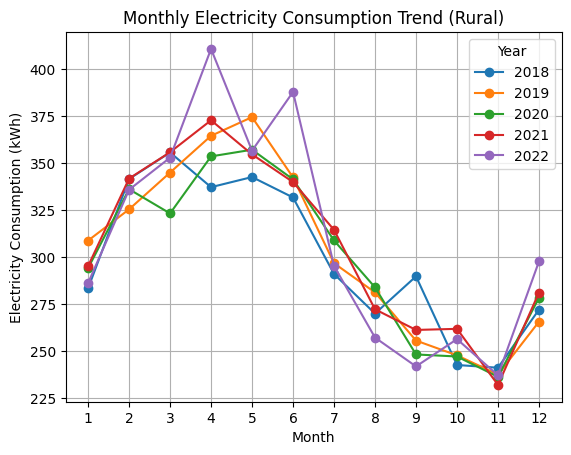

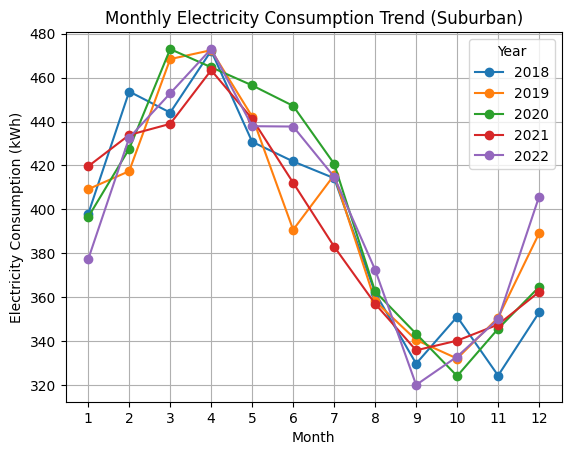

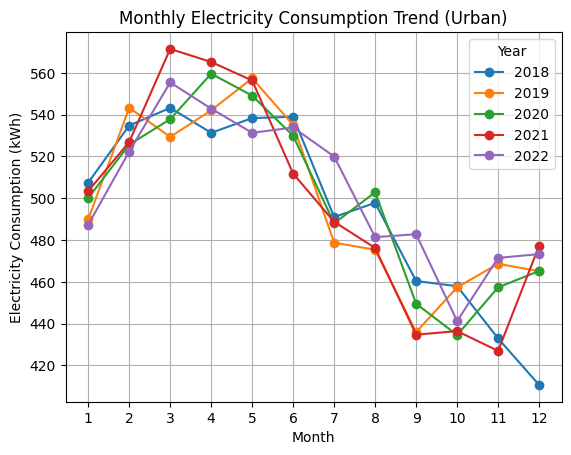

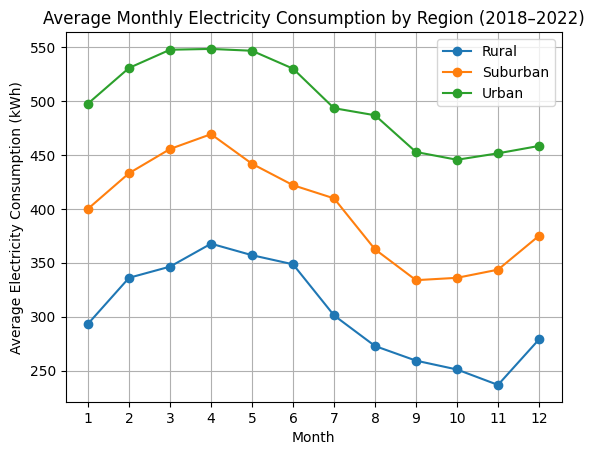

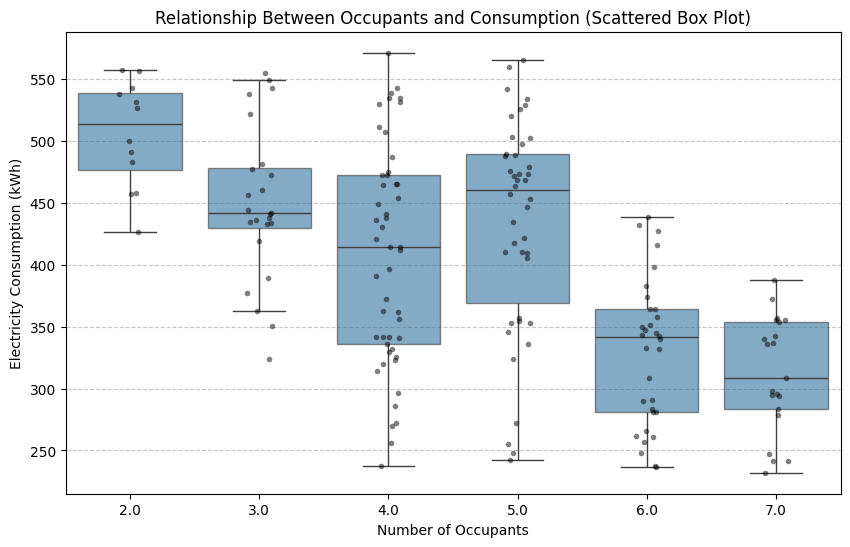

In [ ]:
# -----------------------------------------------------
# Task 3: Data Visualisation
# Using cleaned data from Task 1
# -----------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------
# 1. Load cleaned dataset
# -----------------------------------------------------
# Assuming the file is in the same directory
df = pd.read_csv("cleaned_dataset_student.csv")

# -----------------------------------------------------
# 2. Monthly consumption trends for EACH region
# -----------------------------------------------------
for region in df["Region"].unique():
    region_data = df[df["Region"] == region]

    plt.figure()

    for year in sorted(region_data["Year"].unique()):
        year_data = region_data[region_data["Year"] == year].sort_values("Month")
        plt.plot(
            year_data["Month"],
            year_data["Consumption_kWh"],
            marker="o",
            label=str(year)
        )

    plt.xticks(range(1, 13))
    plt.xlabel("Month")
    plt.ylabel("Electricity Consumption (kWh)")
    plt.title(f"Monthly Electricity Consumption Trend ({region})")
    plt.legend(title="Year")
    plt.grid()
    plt.show()

# -----------------------------------------------------
# 3. Multi-line plot comparing all regions
# -----------------------------------------------------
plt.figure()

for region in df["Region"].unique():
    region_data = df[df["Region"] == region]
    monthly_avg = region_data.groupby("Month")["Consumption_kWh"].mean()
    plt.plot(monthly_avg.index, monthly_avg.values, marker="o", label=region)

plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Average Electricity Consumption (kWh)")
plt.title("Average Monthly Electricity Consumption by Region (2018–2022)")
plt.legend()
plt.grid()
plt.show()

# -----------------------------------------------------
# 4. & 5. Combined: Scattered Box Plot (Occupants vs Consumption)
# -----------------------------------------------------
plt.figure(figsize=(10, 6))

# Step A: Create the Box Plot
# We use showfliers=False so we don't see duplicate outlier dots
# (since the stripplot below will show ALL dots anyway).
sns.boxplot(
    x="Occupants",
    y="Consumption_kWh",
    data=df,
    showfliers=False,
    boxprops={'alpha': 0.6} # Make boxes slightly transparent
)

# Step B: Overlay the Scatter (Strip) Plot
# jitter=True spreads the dots out horizontally so they don't overlap entirely
sns.stripplot(
    x="Occupants",
    y="Consumption_kWh",
    data=df,
    jitter=True,
    color='black',   # Black dots stand out against colored boxes
    alpha=0.5,       # Transparency helps see density if points overlap
    size=4           # Adjust dot size
)

plt.xlabel("Number of Occupants")
plt.ylabel("Electricity Consumption (kWh)")
plt.title("Relationship Between Occupants and Consumption (Scattered Box Plot)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Model Performance (Improved Linear Regression)
R-squared: 0.973
Mean Absolute Error (MAE): 12.02


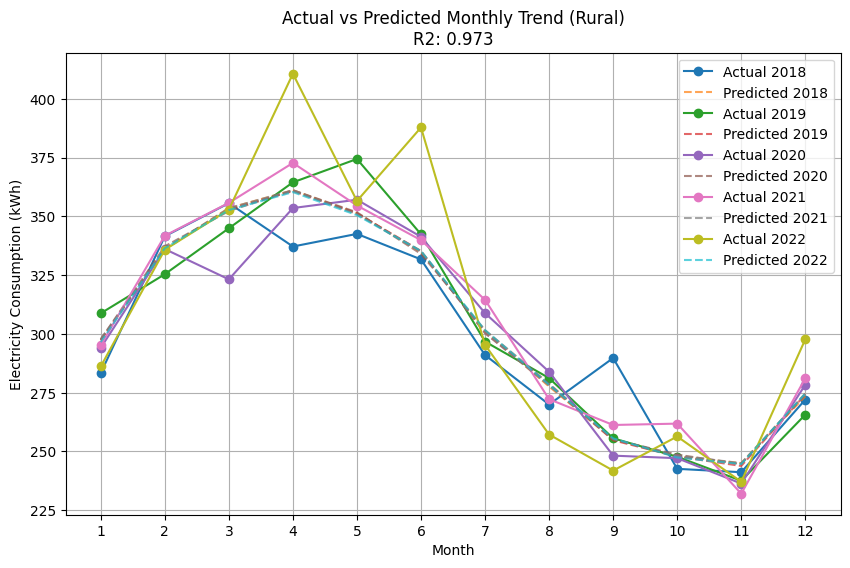

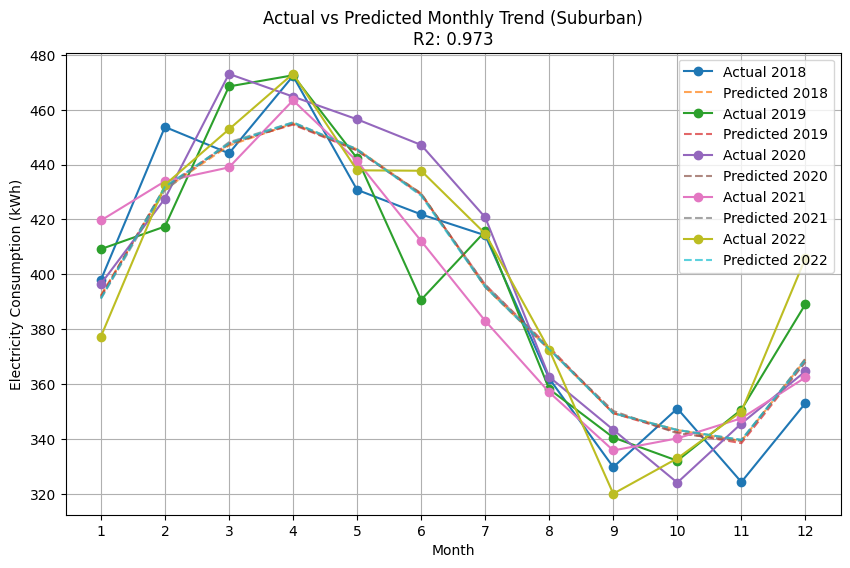

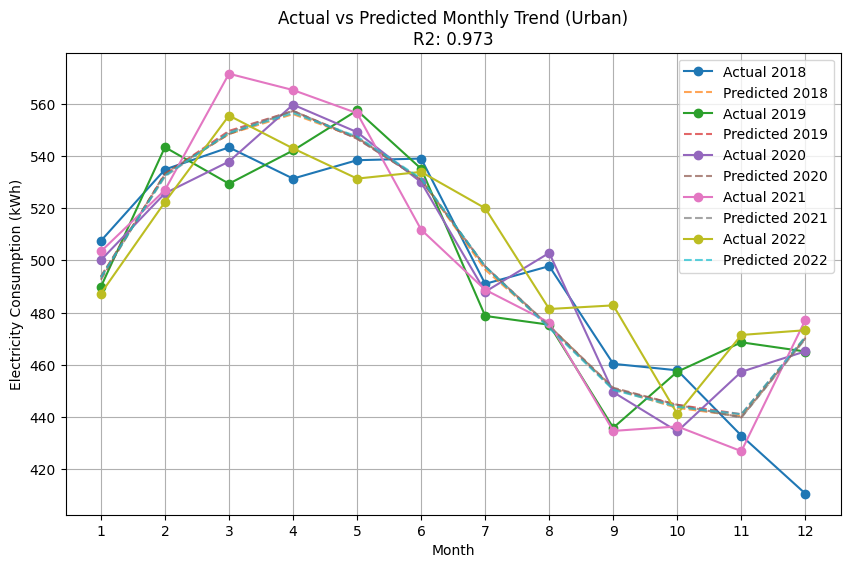

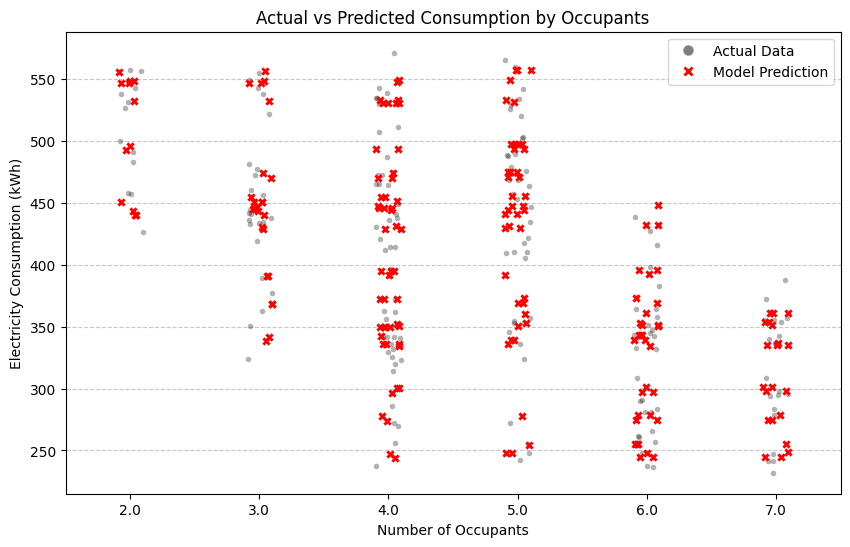

In [ ]:
#Task 4:Linear Regression Model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from matplotlib.lines import Line2D

# -----------------------------------------------------
# 1. Load Data
# -----------------------------------------------------
df = pd.read_csv("cleaned_dataset_student.csv")

# -----------------------------------------------------
# 1.5 IMPROVEMENT: Remove Outliers (IQR Method)
# -----------------------------------------------------
# This filters out extreme data points that confuse the linear model
Q1 = df['Consumption_kWh'].quantile(0.25)
Q3 = df['Consumption_kWh'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Consumption_kWh'] < (Q1 - 1.5 * IQR)) | (df['Consumption_kWh'] > (Q3 + 1.5 * IQR)))]

# -----------------------------------------------------
# 2. IMPROVED Feature Engineering
# -----------------------------------------------------
# Convert Month to string so the model treats it as a Category.
df['Month_Str'] = df['Month'].astype(str)

# One-Hot Encode BOTH Region and Month
# We keep the original 'Region' and 'Month' columns for plotting later
df_encoded = pd.get_dummies(df, columns=["Region", "Month_Str"], drop_first=False)

# Define Features: Occupants + All the new dummy columns
feature_cols = ["Occupants"] + [col for col in df_encoded.columns if "Region_" in col or "Month_Str_" in col]

X = df_encoded[feature_cols]
y = df_encoded["Consumption_kWh"]

# -----------------------------------------------------
# 3. Train Linear Regression Model
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------------------------------
# 4. Evaluate
# -----------------------------------------------------
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Model Performance (Improved Linear Regression)")
print(f"R-squared: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Add predictions to the main dataframe for plotting
# We use the 'X' features we created to predict the whole dataset
df["Predicted_Consumption"] = model.predict(X)

# -----------------------------------------------------
# 5. VISUALIZATION A: Monthly Trends per Region (Task 3 Overlay)
# -----------------------------------------------------
unique_regions = df["Region"].unique()

for region in unique_regions:
    region_data = df[df["Region"] == region]

    plt.figure(figsize=(10, 6))

    # Loop through years to plot lines
    for year in sorted(region_data["Year"].unique()):
        year_data = region_data[region_data["Year"] == year].sort_values("Month")

        # Plot ACTUAL Data (Solid Line)
        plt.plot(
            year_data["Month"],
            year_data["Consumption_kWh"],
            marker="o",
            label=f"Actual {year}"
        )

        # Plot PREDICTED Data (Dashed Line)
        plt.plot(
            year_data["Month"],
            year_data["Predicted_Consumption"],
            linestyle="--",
            alpha=0.7,
            label=f"Predicted {year}"
        )

    plt.xticks(range(1, 13))
    plt.xlabel("Month")
    plt.ylabel("Electricity Consumption (kWh)")
    plt.title(f"Actual vs Predicted Monthly Trend ({region})\nR2: {r2:.3f}")
    plt.legend()
    plt.grid(True)
    plt.show()

# -----------------------------------------------------
# 6. VISUALIZATION B: Scattered Box Plot (Occupants)
# -----------------------------------------------------
plt.figure(figsize=(10, 6))

# Actual Data (Black Dots)
sns.stripplot(
    x="Occupants",
    y="Consumption_kWh",
    data=df,
    jitter=True,
    color='black',
    alpha=0.3,
    size=4
)

# Predicted Data (Red X)
sns.stripplot(
    x="Occupants",
    y="Predicted_Consumption",
    data=df,
    jitter=True,
    color='red',
    marker='X',
    size=6
)

# Custom Legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Actual Data', markersize=8, alpha=0.5),
    Line2D([0], [0], marker='X', color='w', markerfacecolor='red', label='Model Prediction', markersize=8)
]
plt.legend(handles=legend_elements)

plt.xlabel("Number of Occupants")
plt.ylabel("Electricity Consumption (kWh)")
plt.title(f"Actual vs Predicted Consumption by Occupants")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()